In [ ]:
!nvidia-smi

Mon May 16 06:45:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    25W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cu113 True


In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-m9c6r0ub
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-m9c6r0ub
     |████████████████████████████████| 50 kB 2.7 MB/s 
     |████████████████████████████████| 74 kB 2.8 MB/s 
     |████████████████████████████████| 147 kB 43.0 MB/s 
     |████████████████████████████████| 130 kB 41.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
     |████████████████████████████████| 749 kB 43.2 MB/s 
     |████████████████████████████████| 843 kB 41.3 MB/s 
     |████████████████████████████████| 596 kB 37.6 MB/s 
     |████████████████████████████████| 112 kB 52.3 MB/s 
  Created wheel for detectron2: filename=detectron2-0.6-cp37-cp37m-linux_x86_64.whl size=5261118 sha256=5bb158081fd9e427f5642e2f4f2af9fb188eea7a1c98543755fdeecb210d9712
  Stored in directory: /tmp/pip-ephem-wheel-cache-gu49lrm9/wheels/07/dc/32/0322cb484dbefab8b9366bfedbaff5060ac7

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import pandas as pd

from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm # progress bar
from tqdm.notebook import tqdm
tqdm.pandas()

from datetime import datetime
import time
import matplotlib.pyplot as plt

import os, json, cv2, random
import skimage.io as io
import copy
from pathlib import Path
from typing import Optional
import json
import matplotlib.pyplot as plt

import ast


from tqdm import tqdm
import itertools

import torch
!pip install -U git+https://github.com/albu/albumentations > /dev/null
import albumentations as A
from albumentations.pytorch import transforms#.ToTensorV2
# from albumentations.pytorch.transforms import ToTensorV2

from glob import glob
import numba
from numba import jit

from pycocotools.coco import COCO
# detectron2
from detectron2.structures import BoxMode
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultPredictor, DefaultTrainer, launch
from detectron2.evaluation import COCOEvaluator
from detectron2.structures import BoxMode
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.logger import setup_logger
from detectron2.utils.visualizer import Visualizer

from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader
from detectron2.data import detection_utils as utils


from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader
from detectron2.data import detection_utils as utils
import detectron2.data.transforms as T
from detectron2.evaluation import COCOEvaluator, inference_on_dataset



from detectron2.evaluation.evaluator import DatasetEvaluator
import pycocotools.mask as mask_util
from detectron2.engine import BestCheckpointer
from detectron2.checkpoint import DetectionCheckpointer

setup_logger()

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-lywt5ptt


<Logger detectron2 (DEBUG)>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
import json

with open('/content/drive/MyDrive/kvasir/bboxes.json') as f:
    bbox = json.load(f)

file_path=r'/content/drive/MyDrive/kvasir/test.txt'
path=r'kvasir'
# load_data(path,file_path)
f = open(file_path, "r")
train = f.read().split("\n")[:-1]
file_path=r'/content/drive/MyDrive/kvasir/test.txt'
path=r'kvasir'
# load_data(path,file_path)
f = open(file_path, "r")
test = f.read().split("\n")[:-1]
df=pd.DataFrame(test)
h=[]
w=[]
l=[]
xmin=[]
xmax=[]
ymin=[]
ymax=[]
for j in df[0]:
    h.append(bbox[j]['height'])
    w.append(bbox[j]['width'])
    l.append(bbox[j]['bbox'][0]['label'])
    xmin.append(bbox[j]['bbox'][0]['xmin'])
    xmax.append(bbox[j]['bbox'][0]['xmax'])
    ymin.append(bbox[j]['bbox'][0]['ymin'])
    ymax.append(bbox[j]['bbox'][0]['ymax'])
df['height']=h
df['width']=w
df['label']=l
df['xmin']=xmin
df['ymin']=ymin
df['xmax']=xmax
df['ymax']=ymax
df.rename(columns={0: 'filename'}, inplace=True)
test_df=df
test_df["filename"] = df["filename"]+".jpg"
test_df['filename']="/content/drive/MyDrive/kvasir/images/" +test_df['filename']
train_df=pd.DataFrame(train)
h=[]
w=[]
l=[]
xmin=[]
xmax=[]
ymin=[]
ymax=[]
for j in train_df[0]:
    h.append(bbox[j]['height'])
    w.append(bbox[j]['width'])
    l.append(bbox[j]['bbox'][0]['label'])
    xmin.append(bbox[j]['bbox'][0]['xmin'])
    xmax.append(bbox[j]['bbox'][0]['xmax'])
    ymin.append(bbox[j]['bbox'][0]['ymin'])
    ymax.append(bbox[j]['bbox'][0]['ymax'])

train_df['height']=h
train_df['width']=w
train_df['label']=l
train_df['xmin']=xmin
train_df['ymin']=ymin
train_df['xmax']=xmax
train_df['ymax']=ymax
train_df.rename(columns={0: 'image_id'}, inplace=True)
train_df["image"] = train_df["image_id"]+".jpg"
train_df['image_path']='/content/drive/MyDrive/kvasir/images/'+train_df['image']



In [ ]:
for i in range(len(df)):
  image = mpimg.imread(df['image_path'][i])
  df['height'][i]=image.shape[0]
  df['width'][i]=image.shape[1]

In [ ]:
train_df.head()

image_id  height  width       label  xmin  ymin  xmax  \
0  ckd4ipizn000d3b5yk2vrbyyz     576    768  instrument   435    25   717   
1  ckcxct8oj000k3b5y9iwia72h     576    720  instrument   387   376   613   
2  ckd4ig3d700043b5y0p70afjj     576    720  instrument   238    11   427   
3  ckd03in4g001d3b5yngyc734r     576    768  instrument   396    26   524   
4  ckcx9nmko001u3b5yopeccdvo     576    720  instrument    90    17   431   

   ymax                          image  \
0   410  ckd4ipizn000d3b5yk2vrbyyz.jpg   
1   555  ckcxct8oj000k3b5y9iwia72h.jpg   
2   462  ckd4ig3d700043b5y0p70afjj.jpg   
3   318  ckd03in4g001d3b5yngyc734r.jpg   
4   195  ckcx9nmko001u3b5yopeccdvo.jpg   

                                          image_path  
0  /content/drive/MyDrive/kvasir/images/ckd4ipizn...  
1  /content/drive/MyDrive/kvasir/images/ckcxct8oj...  
2  /content/drive/MyDrive/kvasir/images/ckd4ig3d7...  
3  /content/drive/MyDrive/kvasir/images/ckd03in4g...  
4  /content/drive/MyDrive/kvasir/images/ckcx9nmko...

In [ ]:
df_train=train_df.drop('label',axis=1)
df_train.head()

image_id  height  width  xmin  ymin  xmax  ymax  \
0  ckd4ipizn000d3b5yk2vrbyyz     576    768   435    25   717   410   
1  ckcxct8oj000k3b5y9iwia72h     576    720   387   376   613   555   
2  ckd4ig3d700043b5y0p70afjj     576    720   238    11   427   462   
3  ckd03in4g001d3b5yngyc734r     576    768   396    26   524   318   
4  ckcx9nmko001u3b5yopeccdvo     576    720    90    17   431   195   

                           image  \
0  ckd4ipizn000d3b5yk2vrbyyz.jpg   
1  ckcxct8oj000k3b5y9iwia72h.jpg   
2  ckd4ig3d700043b5y0p70afjj.jpg   
3  ckd03in4g001d3b5yngyc734r.jpg   
4  ckcx9nmko001u3b5yopeccdvo.jpg   

                                          image_path  
0  /content/drive/MyDrive/kvasir/images/ckd4ipizn...  
1  /content/drive/MyDrive/kvasir/images/ckcxct8oj...  
2  /content/drive/MyDrive/kvasir/images/ckd4ig3d7...  
3  /content/drive/MyDrive/kvasir/images/ckd03in4g...  
4  /content/drive/MyDrive/kvasir/images/ckcx9nmko...

In [ ]:
x_min = df_train['xmin']
y_min = df_train['ymin']
x_max = df_train['xmax']
y_max = df_train['ymax']
bboxes = list()
for i in range(len(x_min)):
    bboxes.append([[x_min[i],y_min[i],x_max[i],y_max[i]]])
df_train['bboxes'] = bboxes
df_train.head()

image_id  height  width  xmin  ymin  xmax  ymax  \
0  ckd4ipizn000d3b5yk2vrbyyz     576    768   435    25   717   410   
1  ckcxct8oj000k3b5y9iwia72h     576    720   387   376   613   555   
2  ckd4ig3d700043b5y0p70afjj     576    720   238    11   427   462   
3  ckd03in4g001d3b5yngyc734r     576    768   396    26   524   318   
4  ckcx9nmko001u3b5yopeccdvo     576    720    90    17   431   195   

                           image  \
0  ckd4ipizn000d3b5yk2vrbyyz.jpg   
1  ckcxct8oj000k3b5y9iwia72h.jpg   
2  ckd4ig3d700043b5y0p70afjj.jpg   
3  ckd03in4g001d3b5yngyc734r.jpg   
4  ckcx9nmko001u3b5yopeccdvo.jpg   

                                          image_path                  bboxes  
0  /content/drive/MyDrive/kvasir/images/ckd4ipizn...   [[435, 25, 717, 410]]  
1  /content/drive/MyDrive/kvasir/images/ckcxct8oj...  [[387, 376, 613, 555]]  
2  /content/drive/MyDrive/kvasir/images/ckd4ig3d7...   [[238, 11, 427, 462]]  
3  /content/drive/MyDrive/kvasir/images/ckd03in4g...   [[396, 26, 524, 318]]  
4  /content/drive/MyDrive/kvasir/images/ckcx9nmko...    [[90, 17, 431, 195]]

In [ ]:
# df=df_train
# df_train["Width"]=676
# df_train["Height"]=380
# df_train.sample(2)

image_id  height  width  xmin  ymin  xmax  ymax  \
69  ckcuazqgy00073b5y8kg82iqm     532    633   368   355   541   532   
46  ckcu99qx200043b5yd2c5g84t     576    720   448   437   607   556   

                            image  \
69  ckcuazqgy00073b5y8kg82iqm.jpg   
46  ckcu99qx200043b5yd2c5g84t.jpg   

                                           image_path                  bboxes  \
69  /content/drive/MyDrive/kvasir/images/ckcuazqgy...  [[368, 355, 541, 532]]   
46  /content/drive/MyDrive/kvasir/images/ckcu99qx2...  [[448, 437, 607, 556]]   

    Width  Height  
69    676     380  
46    676     380

In [ ]:
df_train.head()

image_id  height  width  xmin  ymin  xmax  ymax  \
0  ckd4ipizn000d3b5yk2vrbyyz     576    768   435    25   717   410   
1  ckcxct8oj000k3b5y9iwia72h     576    720   387   376   613   555   
2  ckd4ig3d700043b5y0p70afjj     576    720   238    11   427   462   
3  ckd03in4g001d3b5yngyc734r     576    768   396    26   524   318   
4  ckcx9nmko001u3b5yopeccdvo     576    720    90    17   431   195   

                           image  \
0  ckd4ipizn000d3b5yk2vrbyyz.jpg   
1  ckcxct8oj000k3b5y9iwia72h.jpg   
2  ckd4ig3d700043b5y0p70afjj.jpg   
3  ckd03in4g001d3b5yngyc734r.jpg   
4  ckcx9nmko001u3b5yopeccdvo.jpg   

                                          image_path                  bboxes  \
0  /content/drive/MyDrive/kvasir/images/ckd4ipizn...   [[435, 25, 717, 410]]   
1  /content/drive/MyDrive/kvasir/images/ckcxct8oj...  [[387, 376, 613, 555]]   
2  /content/drive/MyDrive/kvasir/images/ckd4ig3d7...   [[238, 11, 427, 462]]   
3  /content/drive/MyDrive/kvasir/images/ckd03in4g...   [[396, 26, 524, 318]]   
4  /content/drive/MyDrive/kvasir/images/ckcx9nmko...    [[90, 17, 431, 195]]   

   Width  Height  fold  
0    676     380     1  
1    676     380     1  
2    676     380     2  
3    676     380     1  
4    676     380     1

In [ ]:
n_spl=3
Selected_Fold=2 #0..2

from sklearn.model_selection import GroupKFold
gkf  = GroupKFold(n_splits = n_spl) # num_folds=3 as there are total 3 videos
df_train = df_train.reset_index(drop=True)
df_train['fold'] = -1
for fold, (train_idx, val_idx) in enumerate(gkf.split(df_train, groups = df_train.image_id.tolist())):
    df_train.loc[val_idx, 'fold'] = fold
display(df_train.fold.value_counts())

0    40
1    39
2    39
Name: fold, dtype: int64

In [ ]:
def get_data_dicts(
    _train_df: pd.DataFrame,
    debug: bool = False,
    data_type:str="train"

):

    if debug:
        _train_df = _train_df.iloc[:10]  # For debug...
    dataset_dicts = []
    if data_type=="train":
        _train_df=_train_df[_train_df.fold != Selected_Fold]
    else: # val
        _train_df=_train_df[_train_df.fold == Selected_Fold]

    for index, row in tqdm(_train_df.iterrows(), total=len(_train_df)):
        record = {}
        filename  = row.image_path #filename = str(f'{imgdir}/{image_id}.png')
        image_id = row.image_id
        image_height= row.height
        image_width = row.width
        bboxes_coco = row.bboxes
        #bboxes_coco  = np.array(row.bboxes).astype(np.float32).copy()
        record["file_name"] = filename
        record["image_id"] = image_id
        record["width"] = image_width
        record["height"] = image_height
        objs = []
        class_id = 0
        for bbox_idx in range(len(bboxes_coco)):
            bbox=bboxes_coco[bbox_idx]
            obj = {
                    "bbox": bbox,
                    "bbox_mode": BoxMode.XYXY_ABS,
                    "category_id": class_id,
                }
            objs.append(obj)
            record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

In [ ]:
thing_classes=['instrument']
debug=False

Data_Resister_training="BR_data_train2";
Data_Resister_valid="BR_data_valid2";


DatasetCatalog.register(
    Data_Resister_training,
    lambda: get_data_dicts(
        df_train,
        debug=debug,
        data_type="train"
    ),
)
MetadataCatalog.get(Data_Resister_training).set(thing_classes=thing_classes)


DatasetCatalog.register(
    Data_Resister_valid,
    lambda: get_data_dicts(
        df_train,
        debug=debug,
        data_type="val"
        ),
    )
MetadataCatalog.get(Data_Resister_valid).set(thing_classes=thing_classes)


dataset_dicts_train = DatasetCatalog.get(Data_Resister_training)
metadata_dicts_train = MetadataCatalog.get(Data_Resister_training)

dataset_dicts_valid = DatasetCatalog.get(Data_Resister_valid)
metadata_dicts_valid = MetadataCatalog.get(Data_Resister_valid)

AssertionError: ignored

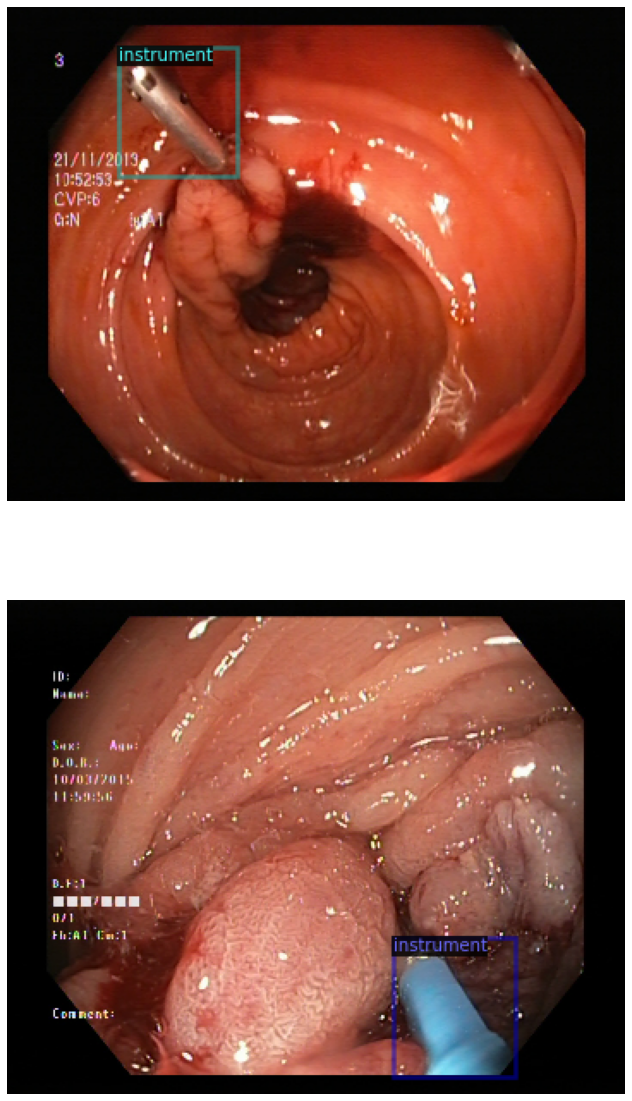

In [ ]:
fig, ax = plt.subplots(2, 1, figsize =(35,20))
i=-1
for d in random.sample(dataset_dicts_train, 2):
    i=i+1
    img = cv2.imread(d["file_name"])
    v = Visualizer(img[:, :, :],
                   metadata=metadata_dicts_train,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_dataset_dict(d)
    ax[i].grid(False)
    ax[i].axis('off')
    ax[i].imshow(out.get_image()[:, :, ::-1])

In [ ]:
import logging
import numpy as np
from detectron2.engine.hooks import HookBase
from detectron2.evaluation import inference_context
from detectron2.utils.logger import log_every_n_seconds
from detectron2.data import DatasetMapper, build_detection_test_loader
import detectron2.utils.comm as comm
import torch
import time
import datetime

class LossEvalHook(HookBase):
    def __init__(self, cfg, model, data_loader):
        self._model = model
        self._period = cfg.TEST.EVAL_PERIOD
        self._root = cfg.OUTPUT_DIR
        self._data_loader = data_loader
        self._min_mean_loss = 0.0
        self._bfirst = True

    def _do_loss_eval(self):
        # Copying inference_on_dataset from evaluator.py
        total = len(self._data_loader)
        num_warmup = min(5, total - 1)

        start_time = time.perf_counter()
        total_compute_time = 0
        losses = []
        for idx, inputs in enumerate(self._data_loader):
            if idx == num_warmup:
                start_time = time.perf_counter()
                total_compute_time = 0
            start_compute_time = time.perf_counter()
            if torch.cuda.is_available():
                torch.cuda.synchronize()
            total_compute_time += time.perf_counter() - start_compute_time
            iters_after_start = idx + 1 - num_warmup * int(idx >= num_warmup)
            seconds_per_img = total_compute_time / iters_after_start
            if idx >= num_warmup * 2 or seconds_per_img > 5:
                total_seconds_per_img = (time.perf_counter() - start_time) / iters_after_start
                eta = datetime.timedelta(seconds=int(total_seconds_per_img * (total - idx - 1)))
                log_every_n_seconds(
                    logging.INFO,
                    "Loss on Validation  done {}/{}. {:.4f} s / img. ETA={}".format(
                        idx + 1, total, seconds_per_img, str(eta)
                    ),
                    n=5,
                )
            loss_batch = self._get_loss(inputs)
            losses.append(loss_batch)
        mean_loss = np.mean(losses)
        self.trainer.storage.put_scalar('validation_loss', mean_loss)
        comm.synchronize()
        return mean_loss

    def _get_loss(self, data):
        # How loss is calculated on train_loop
        metrics_dict = self._model(data)
        metrics_dict = {
            k: v.detach().cpu().item() if isinstance(v, torch.Tensor) else float(v)
            for k, v in metrics_dict.items()
        }
        total_losses_reduced = sum(loss for loss in metrics_dict.values())
        return total_losses_reduced

    def after_step(self):
        next_iter = self.trainer.iter + 1
        is_final = next_iter == self.trainer.max_iter
        if is_final or (self._period > 0 and next_iter % self._period == 0):
            mean_loss = self._do_loss_eval()
            if self._bfirst:
                self._min_mean_loss = mean_loss
                self._bfirst = False
            #-------- save best model according to metrics --------
            if mean_loss < self._min_mean_loss:
                self._min_mean_loss = mean_loss
                self.trainer.checkpointer.save('model_best')
                with open('bestiter.txt', 'a+') as f:
                    f.write('min val loss: ' + str(mean_loss) + ' at iter: ' + str(self.trainer.iter) + '\n')

In [ ]:
class Trainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name,("bbox",), True, output_folder)
        #return COCOEvaluator(dataset_name, cfg, True, output_folder)

        #return MAPIOUEvaluator(dataset_name)

    def build_hooks(self):
        hooks = super().build_hooks()
        hooks.insert(-1,LossEvalHook(
            self.cfg,
            self.model,
            build_detection_test_loader(
                self.cfg,
                self.cfg.DATASETS.TEST[0],
                DatasetMapper(self.cfg,True)
            )
        ))
        return hooks

In [ ]:
cfg = get_cfg()
config_name = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml--"

cfg.merge_from_file(model_zoo.get_config_file(config_name))
cfg.DATASETS.TRAIN = (Data_Resister_training,)
cfg.DATASETS.TEST = (Data_Resister_valid,)

cfg.MODEL.WEIGHTS ="../input/brdetectron2l/output/model_best.pth"

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_name)

cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # 64 is slower but more accurate (128 faster but less accurate)


cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # only has one class  + 1
cfg.MODEL.RETINANET.NUM_CLASSES = 2 # only has one class  + 1

cfg.SOLVER.IMS_PER_BATCH = 2 #(2 is per defaults)
cfg.SOLVER.BASE_LR = 0.0005 #(quite high base learning rate but should drop)
cfg.SOLVER.GAMMA = 0.1


cfg.SOLVER.WARMUP_ITERS = 10 #How many iterations to go from 0 to reach base LR
cfg.SOLVER.MAX_ITER = 800 #Maximum of iterations 1
cfg.SOLVER.STEPS = (200,400,750) #At which point to change the LR 0.25,0.5

cfg.TEST.EVAL_PERIOD = 60
#cfg.SOLVER.CHECKPOINT_PERIOD=100

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
#trainer = AugTrainer(cfg) # with  data augmentation
trainer = Trainer(cfg)  # without data augmentation
trainer.resume_or_load(resume=False)
trainer.train()

[05/02 09:55:17 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

100%|██████████| 79/79 [00:00<00:00, 5659.56it/s]

[05/02 09:55:17 d2.data.build]: Removed 0 images with no usable annotations. 79 images left.
[05/02 09:55:17 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[05/02 09:55:17 d2.data.build]: Using training sampler TrainingSampler
[05/02 09:55:17 d2.data.common]: Serializing 79 elements to byte tensors and concatenating them all ...
[05/02 09:55:17 d2.data.common]: Serialized dataset takes 0.03 MiB
[05/02 09:55:17 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]



100%|██████████| 39/39 [00:00<00:00, 3385.09it/s]

[05/02 09:55:17 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 09:55:17 d2.data.common]: Serialized dataset takes 0.02 MiB



Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, w

[05/02 09:55:17 d2.engine.train_loop]: Starting training from iteration 0
[05/02 09:55:42 d2.utils.events]:  eta: 0:16:08  iter: 19  total_loss: 1.266  loss_cls: 0.5195  loss_box_reg: 0.6106  loss_rpn_cls: 0.008726  loss_rpn_loc: 0.005374  time: 1.2052  data_time: 0.0311  lr: 0.0005  max_mem: 2803M
[05/02 09:56:05 d2.utils.events]:  eta: 0:15:30  iter: 39  total_loss: 0.7834  loss_cls: 0.2189  loss_box_reg: 0.5373  loss_rpn_cls: 0.004262  loss_rpn_loc: 0.002575  time: 1.1900  data_time: 0.0078  lr: 0.0005  max_mem: 2803M


100%|██████████| 39/39 [00:00<00:00, 7403.05it/s]

[05/02 09:56:29 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 09:56:29 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 09:56:29 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 09:56:29 d2.evaluation.coco_evaluation]: Trying to convert 'BR_data_valid2' to COCO format ...
[05/02 09:56:29 d2.data.datasets.coco]: Converting annotations of dataset 'BR_data_valid2' to COCO format ...)



100%|██████████| 39/39 [00:00<00:00, 8144.28it/s]

[05/02 09:56:29 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[05/02 09:56:29 d2.data.datasets.coco]: Conversion finished, #images: 39, #annotations: 39
[05/02 09:56:29 d2.data.datasets.coco]: Caching COCO format annotations at './output/inference/BR_data_valid2_coco_format.json' ...
[05/02 09:56:29 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 09:56:33 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0024 s/iter. Inference: 0.3220 s/iter. Eval: 0.0004 s/iter. Total: 0.3249 s/iter. ETA=0:00:09
[05/02 09:56:39 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0026 s/iter. Inference: 0.3272 s/iter. Eval: 0.0004 s/iter. Total: 0.3304 s/iter. ETA=0:00:03
[05/02 09:56:43 d2.evaluation.evaluator]: Total inference time: 0:00:11.311129 (0.332680 s / iter per device, on 1 devices)
[05/02 09:56:43 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.326950 s / iter per device, on 1 devices)
[05/02 09:56:43 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 09:56:43 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 09:56:43 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 09:56:43 d2.ev

100%|██████████| 39/39 [00:00<00:00, 6838.83it/s]

[05/02 09:58:00 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 09:58:00 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 09:58:00 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 09:58:00 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 09:58:04 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0019 s/iter. Inference: 0.3221 s/iter. Eval: 0.0003 s/iter. Total: 0.3243 s/iter. ETA=0:00:09
[05/02 09:58:09 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0019 s/iter. Inference: 0.3259 s/iter. Eval: 0.0003 s/iter. Total: 0.3283 s/iter. ETA=0:00:03
[05/02 09:58:13 d2.evaluation.evaluator]: Total inference time: 0:00:11.196948 (0.329322 s / iter per device, on 1 devices)
[05/02 09:58:13 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.325454 s / iter per device, on 1 devices)
[05/02 09:58:13 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 09:58:13 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 09:58:13 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 09:58:13 d2.ev

100%|██████████| 39/39 [00:00<00:00, 3110.85it/s]

[05/02 09:59:35 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 09:59:35 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 09:59:35 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 09:59:35 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 09:59:38 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0017 s/iter. Inference: 0.3198 s/iter. Eval: 0.0003 s/iter. Total: 0.3218 s/iter. ETA=0:00:09
[05/02 09:59:44 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0022 s/iter. Inference: 0.3244 s/iter. Eval: 0.0003 s/iter. Total: 0.3270 s/iter. ETA=0:00:03
[05/02 09:59:48 d2.evaluation.evaluator]: Total inference time: 0:00:11.172111 (0.328592 s / iter per device, on 1 devices)
[05/02 09:59:48 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.324639 s / iter per device, on 1 devices)
[05/02 09:59:48 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 09:59:48 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 09:59:48 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 09:59:48 d2.ev

100%|██████████| 39/39 [00:00<00:00, 4132.32it/s]

[05/02 10:01:08 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 10:01:08 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 10:01:08 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 10:01:08 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 10:01:12 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0021 s/iter. Inference: 0.3210 s/iter. Eval: 0.0003 s/iter. Total: 0.3234 s/iter. ETA=0:00:09
[05/02 10:01:17 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0021 s/iter. Inference: 0.3246 s/iter. Eval: 0.0003 s/iter. Total: 0.3272 s/iter. ETA=0:00:03
[05/02 10:01:21 d2.evaluation.evaluator]: Total inference time: 0:00:11.188319 (0.329068 s / iter per device, on 1 devices)
[05/02 10:01:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.325135 s / iter per device, on 1 devices)
[05/02 10:01:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 10:01:21 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 10:01:21 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 10:01:21 d2.ev

100%|██████████| 39/39 [00:00<00:00, 6200.36it/s]

[05/02 10:02:42 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 10:02:42 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 10:02:42 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 10:02:42 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 10:02:46 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0016 s/iter. Inference: 0.3199 s/iter. Eval: 0.0003 s/iter. Total: 0.3218 s/iter. ETA=0:00:09
[05/02 10:02:51 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0022 s/iter. Inference: 0.3240 s/iter. Eval: 0.0003 s/iter. Total: 0.3267 s/iter. ETA=0:00:03
[05/02 10:02:55 d2.evaluation.evaluator]: Total inference time: 0:00:11.162873 (0.328320 s / iter per device, on 1 devices)
[05/02 10:02:55 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.324289 s / iter per device, on 1 devices)
[05/02 10:02:55 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 10:02:55 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 10:02:55 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 10:02:55 d2.ev

100%|██████████| 39/39 [00:00<00:00, 7553.12it/s]

[05/02 10:04:15 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 10:04:15 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 10:04:15 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 10:04:15 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 10:04:19 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0015 s/iter. Inference: 0.3222 s/iter. Eval: 0.0005 s/iter. Total: 0.3242 s/iter. ETA=0:00:09
[05/02 10:04:24 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0021 s/iter. Inference: 0.3255 s/iter. Eval: 0.0004 s/iter. Total: 0.3282 s/iter. ETA=0:00:03
[05/02 10:04:28 d2.evaluation.evaluator]: Total inference time: 0:00:11.199463 (0.329396 s / iter per device, on 1 devices)
[05/02 10:04:28 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.325231 s / iter per device, on 1 devices)
[05/02 10:04:28 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 10:04:28 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 10:04:28 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 10:04:28 d2.ev

100%|██████████| 39/39 [00:00<00:00, 4013.98it/s]

[05/02 10:05:47 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 10:05:47 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 10:05:48 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 10:05:48 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 10:05:51 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0023 s/iter. Inference: 0.3214 s/iter. Eval: 0.0003 s/iter. Total: 0.3240 s/iter. ETA=0:00:09
[05/02 10:05:57 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0023 s/iter. Inference: 0.3246 s/iter. Eval: 0.0003 s/iter. Total: 0.3274 s/iter. ETA=0:00:03
[05/02 10:06:01 d2.evaluation.evaluator]: Total inference time: 0:00:11.168378 (0.328482 s / iter per device, on 1 devices)
[05/02 10:06:01 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.324471 s / iter per device, on 1 devices)
[05/02 10:06:01 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 10:06:01 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 10:06:01 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 10:06:01 d2.ev

100%|██████████| 39/39 [00:00<00:00, 4177.81it/s]

[05/02 10:07:20 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 10:07:20 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 10:07:20 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 10:07:20 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 10:07:24 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0018 s/iter. Inference: 0.3214 s/iter. Eval: 0.0003 s/iter. Total: 0.3235 s/iter. ETA=0:00:09
[05/02 10:07:29 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0022 s/iter. Inference: 0.3245 s/iter. Eval: 0.0003 s/iter. Total: 0.3272 s/iter. ETA=0:00:03
[05/02 10:07:33 d2.evaluation.evaluator]: Total inference time: 0:00:11.173779 (0.328641 s / iter per device, on 1 devices)
[05/02 10:07:33 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.324542 s / iter per device, on 1 devices)
[05/02 10:07:33 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 10:07:33 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 10:07:33 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 10:07:33 d2.ev

100%|██████████| 39/39 [00:00<00:00, 6786.62it/s]

[05/02 10:08:52 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 10:08:52 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 10:08:52 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 10:08:52 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 10:08:56 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0019 s/iter. Inference: 0.3193 s/iter. Eval: 0.0003 s/iter. Total: 0.3214 s/iter. ETA=0:00:08
[05/02 10:09:01 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0024 s/iter. Inference: 0.3252 s/iter. Eval: 0.0003 s/iter. Total: 0.3281 s/iter. ETA=0:00:03
[05/02 10:09:05 d2.evaluation.evaluator]: Total inference time: 0:00:11.181772 (0.328876 s / iter per device, on 1 devices)
[05/02 10:09:05 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.324720 s / iter per device, on 1 devices)
[05/02 10:09:05 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 10:09:05 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 10:09:05 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 10:09:05 d2.ev

100%|██████████| 39/39 [00:00<00:00, 7178.25it/s]

[05/02 10:10:23 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 10:10:23 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 10:10:23 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 10:10:23 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 10:10:27 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0021 s/iter. Inference: 0.3210 s/iter. Eval: 0.0003 s/iter. Total: 0.3233 s/iter. ETA=0:00:09
[05/02 10:10:32 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0024 s/iter. Inference: 0.3239 s/iter. Eval: 0.0003 s/iter. Total: 0.3268 s/iter. ETA=0:00:03
[05/02 10:10:36 d2.evaluation.evaluator]: Total inference time: 0:00:11.162863 (0.328319 s / iter per device, on 1 devices)
[05/02 10:10:36 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.324064 s / iter per device, on 1 devices)
[05/02 10:10:36 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 10:10:36 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 10:10:36 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 10:10:36 d2.ev

100%|██████████| 39/39 [00:00<00:00, 3819.95it/s]

[05/02 10:11:54 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 10:11:54 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 10:11:54 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 10:11:54 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 10:11:58 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0018 s/iter. Inference: 0.3199 s/iter. Eval: 0.0003 s/iter. Total: 0.3220 s/iter. ETA=0:00:09
[05/02 10:12:03 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0025 s/iter. Inference: 0.3253 s/iter. Eval: 0.0003 s/iter. Total: 0.3283 s/iter. ETA=0:00:03
[05/02 10:12:07 d2.evaluation.evaluator]: Total inference time: 0:00:11.192353 (0.329187 s / iter per device, on 1 devices)
[05/02 10:12:07 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.324849 s / iter per device, on 1 devices)
[05/02 10:12:07 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 10:12:07 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 10:12:07 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 10:12:07 d2.ev

100%|██████████| 39/39 [00:00<00:00, 4142.68it/s]

[05/02 10:13:26 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 10:13:26 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 10:13:26 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 10:13:26 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 10:13:30 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0017 s/iter. Inference: 0.3204 s/iter. Eval: 0.0003 s/iter. Total: 0.3224 s/iter. ETA=0:00:09
[05/02 10:13:35 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0022 s/iter. Inference: 0.3245 s/iter. Eval: 0.0003 s/iter. Total: 0.3271 s/iter. ETA=0:00:03
[05/02 10:13:39 d2.evaluation.evaluator]: Total inference time: 0:00:11.180682 (0.328844 s / iter per device, on 1 devices)
[05/02 10:13:39 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.324728 s / iter per device, on 1 devices)
[05/02 10:13:39 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 10:13:39 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 10:13:39 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 10:13:39 d2.ev

100%|██████████| 39/39 [00:00<00:00, 4625.42it/s]

[05/02 10:14:58 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 10:14:58 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 10:14:58 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 10:14:58 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 10:15:02 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0020 s/iter. Inference: 0.3214 s/iter. Eval: 0.0003 s/iter. Total: 0.3237 s/iter. ETA=0:00:09
[05/02 10:15:07 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0023 s/iter. Inference: 0.3254 s/iter. Eval: 0.0003 s/iter. Total: 0.3282 s/iter. ETA=0:00:03
[05/02 10:15:11 d2.evaluation.evaluator]: Total inference time: 0:00:11.186155 (0.329005 s / iter per device, on 1 devices)
[05/02 10:15:11 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.324967 s / iter per device, on 1 devices)
[05/02 10:15:11 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 10:15:11 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 10:15:11 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 10:15:11 d2.ev

100%|██████████| 39/39 [00:00<00:00, 7463.51it/s]

[05/02 10:15:56 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/02 10:15:56 d2.data.common]: Serializing 39 elements to byte tensors and concatenating them all ...
[05/02 10:15:56 d2.data.common]: Serialized dataset takes 0.02 MiB
[05/02 10:15:56 d2.evaluation.evaluator]: Start inference on 39 batches


[05/02 10:16:00 d2.evaluation.evaluator]: Inference done 11/39. Dataloading: 0.0020 s/iter. Inference: 0.3205 s/iter. Eval: 0.0003 s/iter. Total: 0.3227 s/iter. ETA=0:00:09
[05/02 10:16:05 d2.evaluation.evaluator]: Inference done 27/39. Dataloading: 0.0022 s/iter. Inference: 0.3248 s/iter. Eval: 0.0003 s/iter. Total: 0.3274 s/iter. ETA=0:00:03
[05/02 10:16:09 d2.evaluation.evaluator]: Total inference time: 0:00:11.168685 (0.328491 s / iter per device, on 1 devices)
[05/02 10:16:09 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:11 (0.324563 s / iter per device, on 1 devices)
[05/02 10:16:09 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[05/02 10:16:09 d2.evaluation.coco_evaluation]: Saving results to ./output/inference/coco_instances_results.json
[05/02 10:16:09 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[05/02 10:16:09 d2.ev

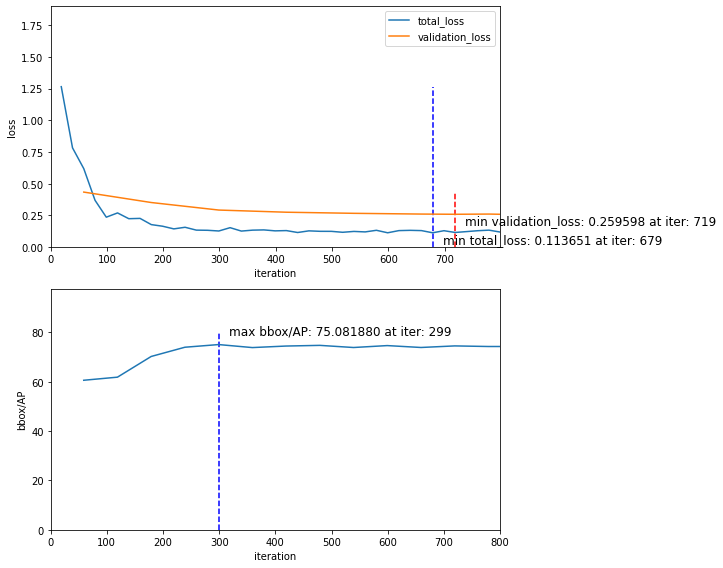

In [ ]:
def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines
experiment_metrics = load_json_arr('./output/metrics.json')

iters_total_loss = [x['iteration'] for x in experiment_metrics if 'total_loss' in x]
total_loss = [x['total_loss'] for x in experiment_metrics if 'total_loss' in x]


iters_validation_loss = [x['iteration'] for x in experiment_metrics if 'validation_loss' in x]
validation_loss = [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x]

iters_AP = [x['iteration'] for x in experiment_metrics if 'bbox/AP' in x]
AP = [x['bbox/AP'] for x in experiment_metrics if 'bbox/AP' in x]

fig, ax = plt.subplots(2,1,figsize=(10,8))
ax[0].plot(iters_total_loss, total_loss)
ax[0].plot(iters_validation_loss, validation_loss)
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('loss')
ax[0].legend(['total_loss', 'validation_loss'], loc='best')

iter = validation_loss.index(min(validation_loss))
ax[0].vlines(iters_validation_loss[iter], 0, float(max(validation_loss)),color="red",linestyles ="dashed")
ax[0].annotate('min validation_loss: %f at iter: %d'%(float(min(validation_loss)),int(iters_validation_loss[iter])),xy=(iters_validation_loss[iter],min(validation_loss)),xytext=(+10,-10),textcoords='offset points',fontsize=12) #arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')

iter = total_loss.index(min(total_loss))
ax[0].vlines(iters_total_loss[iter], 0, float(max(total_loss)),color="blue",linestyles ="dashed")
ax[0].annotate('min total_loss: %f at iter: %d'%(float(min(total_loss)),int(iters_total_loss[iter])),xy=(iters_total_loss[iter],min(total_loss)),xytext=(+10,-10),textcoords='offset points',fontsize=12) #arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')

ax[0].set_xlim([0,max(max(iters_total_loss),max(iters_validation_loss))])
ax[0].set_ylim([0,max(1.5*max(total_loss),1.5*max(validation_loss))])
#ax[0].legend(bbox_to_anchor=(1.0, 1.0))

ax[1].plot(iters_AP, AP)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('bbox/AP')
iter = AP.index(max(AP))
ax[1].vlines(iters_AP[iter], 0, 5+float(max(AP)),color="blue",linestyles ="dashed")
ax[1].annotate('max bbox/AP: %f at iter: %d'%(float(max(AP)),int(iters_AP[iter])),xy=(iters_AP[iter],max(AP)),xytext=(+10,+10),textcoords='offset points',fontsize=12) #arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2')
ax[1].set_xlim([0,max(iters_AP)])
ax[1].set_ylim([0,max(AP)*1.3])

fig.tight_layout()
plt.show()

[05/02 10:16:29 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

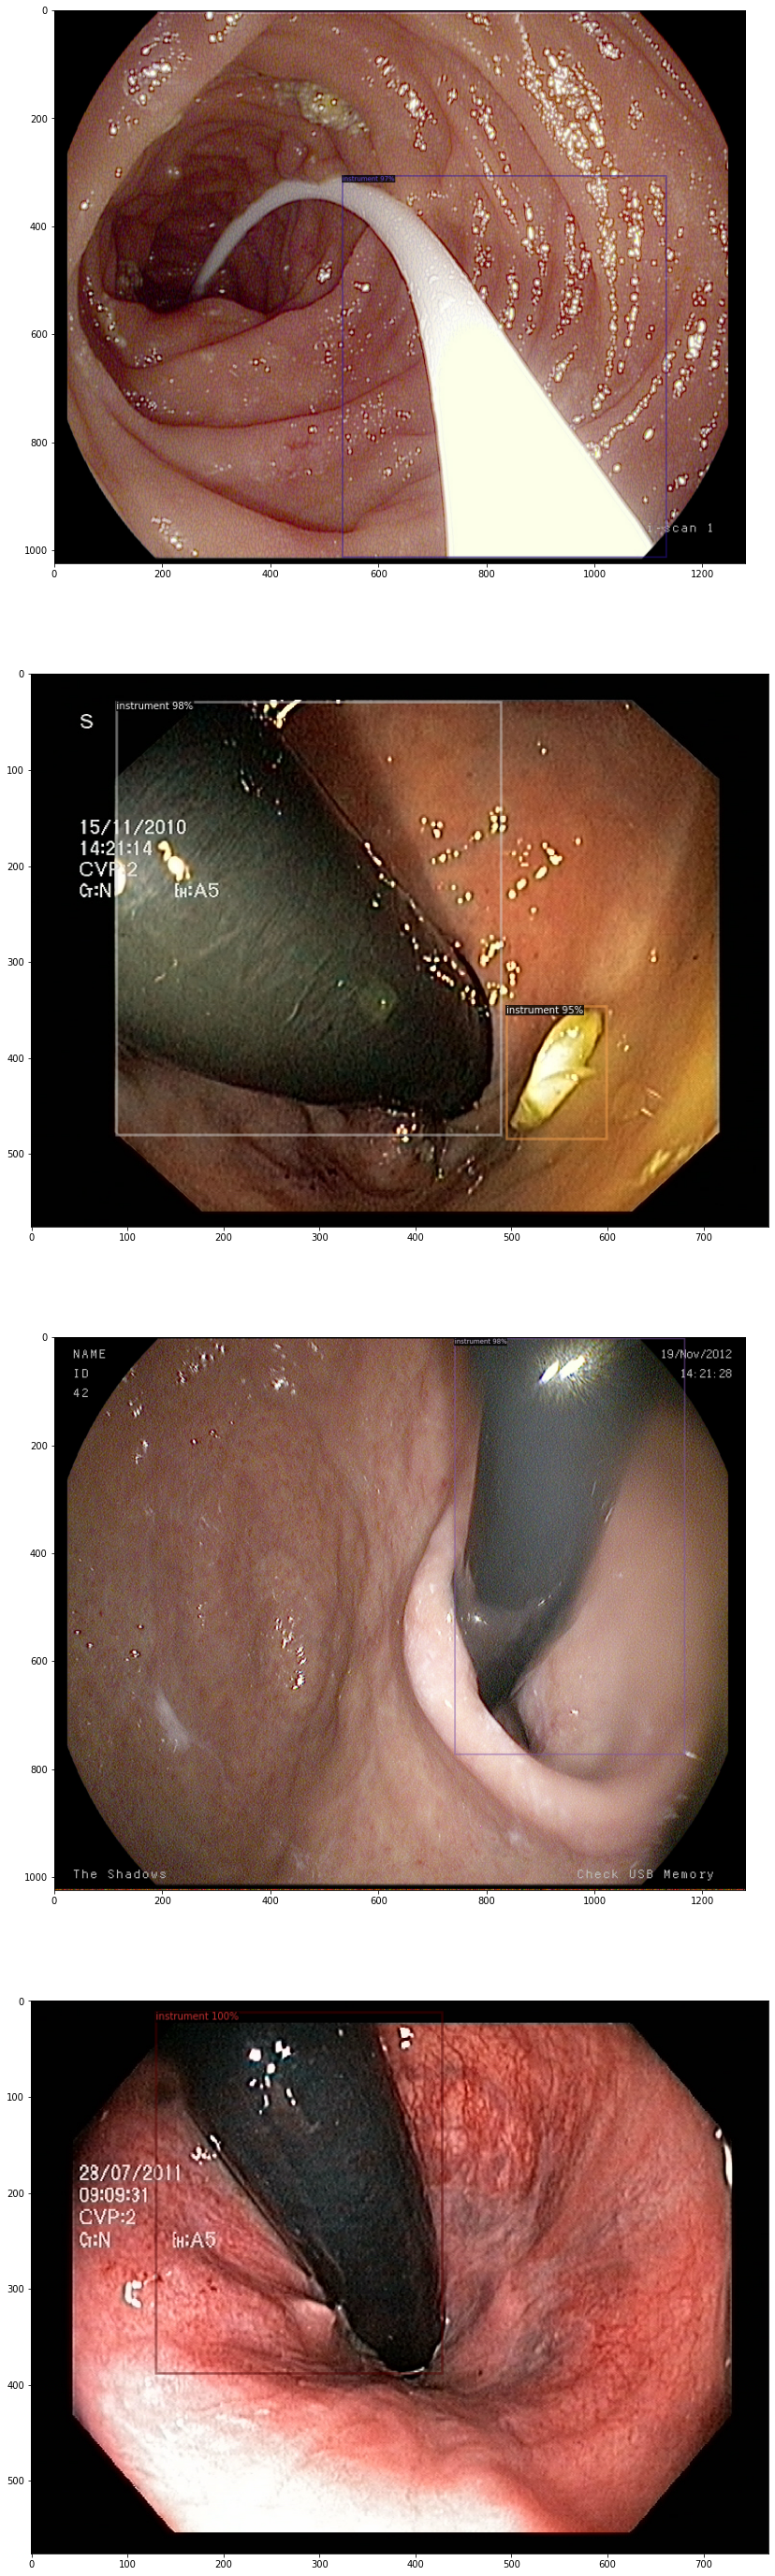

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_best.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold for this model
cfg.DATASETS.TEST = (Data_Resister_valid, )
predictor = DefaultPredictor(cfg)

fig, ax = plt.subplots(4, 1, figsize =(20,50))
indices=[ax[0],ax[1],ax[2],ax[3] ]
i=-1
for d in random.sample(dataset_dicts_valid, 4):
    i=i+1
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, :],
                   metadata=metadata_dicts_valid,
                   scale=1 # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])